In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lorm
import disc.energy_curveling_g24

In [2]:
#initial curve as points on the double sphere S^2 x S^2
m = 128
s2 = lorm.manif.Sphere2()
points = lorm.manif.ManifoldPointArrayParameterized(s2)
points.coords = np.random.randn(2*m,3)
local_coords = np.zeros([2*m,2])
for i in range(m):
    local_coords[2*i,0] = np.sin(2*np.pi*i/m)+0.1 
    local_coords[2*i,1] = np.cos(2*np.pi*i/m)-0.1 
    local_coords[2*i+1,0] = np.sin(2*np.pi*i/m)+0.2
    local_coords[2*i+1,1] = np.cos(2*np.pi*i/m)-0.1
points.local_coords = local_coords

In [3]:
m = int(points.coords.shape[0]/2) # divide by 2 since the points are on the double sphere
N = 2
energy = disc.energy_curveling_g24.plan(m,N, 0.004,16,m=3,sigma=2)

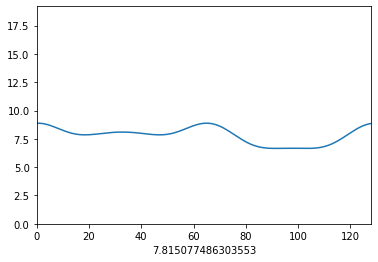

In [4]:
# plot the distance of consecutive points on the curve
fig = plt.figure()
bx = fig.add_subplot(111)
bx.axis(np.array([0,m,0,1.2*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points.local_coords))
bx.add_line(distance)

In [5]:
method = lorm.optim.ConjugateGradientMethod(max_iter=50)
points = method.run(energy,points)

Initial value: f[0] = 0.992747530796309
f[1] = 0.6488279848898199
f[2] = 0.639460895083733
f[3] = 0.6299378637447155
f[4] = 0.6183874930140114
f[5] = 0.6049539151299449
f[6] = 0.5846096038302426
f[7] = 0.5641634962103184
f[8] = 0.5393571405922614
f[9] = 0.514484657151187
f[10] = 0.48859021367279315
f[11] = 0.4613045476558123
f[12] = 0.42741668766121793
f[13] = 0.39710970598287676
f[14] = 0.3699525641017564
f[15] = 0.3461248096572996
f[16] = 0.32580710786576295
f[17] = 0.31053971122766333
f[18] = 0.2937791769341855
f[19] = 0.2758652175184714
f[20] = 0.2576380669655411
f[21] = 0.23977523526857195
f[22] = 0.22798143037684573
f[23] = 0.2168539344919701
f[24] = 0.20486989783717816
f[25] = 0.1907917429045224
f[26] = 0.17694158532160809
f[27] = 0.16690622470220276
f[28] = 0.15756228055343008
f[29] = 0.14961842855661767
f[30] = 0.1408379709870651
f[31] = 0.1341324301744819
f[32] = 0.12967074063362358
f[33] = 0.12576271837276212
f[34] = 0.12252390202426261
f[35] = 0.11950405781425333
f[36] = 0.

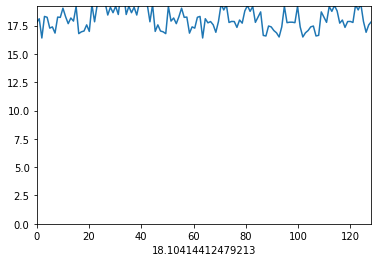

In [6]:
# plot the distance of consecutive points on the curve
fig = plt.figure()
bx = fig.add_subplot(111)
bx.axis(np.array([0,m,0,1.2*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points.local_coords))
bx.add_line(distance)

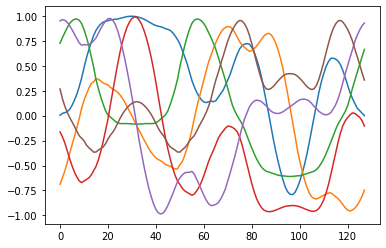

In [7]:
# plotting the components of the parameterization in R^6
for i in range(2):
    for k in range(3):
        plt.plot(points.coords[(0+i):(2*m+i):2,k])

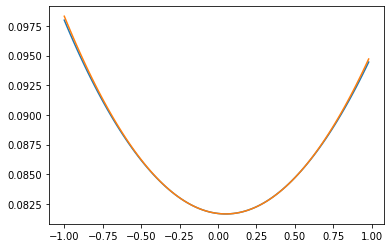

In [8]:
# compute quadratice approximation to test the gradient and Hessian
v=energy.grad(points)
v.coords = 0.01*np.random.randn(2*m,3)
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)